([<matplotlib.patches.Wedge at 0x114c29110>,
  <matplotlib.text.Text at 0x117af7f10>])

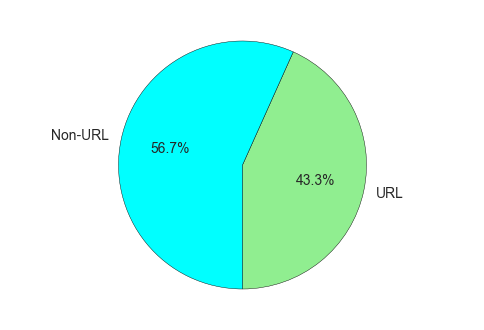

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("darkgrid")
import pyes
%matplotlib inline

conn = pyes.es.ES(server=[('http', 'localhost', 9200)])
q = pyes.query.BoolQuery() 
nq = pyes.query.BoolQuery()
q.add_must(pyes.query.TermQuery(field="text", value="http"))
nq.add_must_not(pyes.query.TermQuery(field="text", value="http"))

resultURL = conn.search(query=q , indices='twitter2' , doc_types='tweet') 
resultNotURL = conn.search(query=nq , indices='twitter2' , doc_types='tweet') 

labels = 'URL', 'Non-URL'
sizes = [len(resultURL), len(resultNotURL)]
colors = ['lightgreen', 'cyan']
explode = (0, 0)

plt.axis('equal');
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=270)